# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [274]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import scipy.stats as linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [275]:
mouse_metadata.value_counts()

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)
a203      Infubinol     Female  20          23            1
s121      Infubinol     Male    23          26            1
q597      Ramicane      Male    20          25            1
q610      Ramicane      Female  18          21            1
q633      Zoniferol     Male    12          25            1
                                                         ..
j246      Capomulin     Female  21          21            1
j296      Ceftamin      Female  24          30            1
j365      Zoniferol     Male    24          28            1
j755      Naftisol      Male    23          27            1
z969      Naftisol      Male    9           30            1
Name: count, Length: 249, dtype: int64

In [276]:
# Checking the number of mice.
mouse_metadata.count()

Mouse ID        249
Drug Regimen    249
Sex             249
Age_months      249
Weight (g)      249
dtype: int64

In [277]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = data[data.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicate_mice_data = duplicate_mice['Mouse ID'].unique()
print(duplicate_mice_data)

['g989']


In [278]:
# Optional: Get all the data for the duplicate mouse ID. 


In [279]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID. Found the duplicate and dropped it fromt he dataframe using "isin" pandas function
clean = data[data['Mouse ID'].isin(duplicate_mice_data)==False]
clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [280]:
# Checking the number of mice in the clean DataFrame. Used len to find the new length of the string.
cleanup = clean['Mouse ID'].value_counts()
cleanupmice = len(cleanup)

cleanupmice =clean['Mouse ID'].value_counts()
cleanupmice

Mouse ID
k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: count, Length: 248, dtype: int64

## Summary Statistics

In [281]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_reg = clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_reg = clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_reg = clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_reg = clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
SEM_reg = clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

#starting the dataframe
summary_statistics = pd.DataFrame({"Mean Tumor Volume": mean_reg, 
                                   "Median Tumor Volume": median_reg, 
                                   "Variance of Tumor Volume": variance_reg,
                                   "STD of Tumor Volume": std_reg, 
                                   "Standard Error of Tumor Volume": SEM_reg})

summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,STD of Tumor Volume,Standard Error of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [282]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregation = clean.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].aggregate(["mean", "median", "var", "std", "sem"])
summary_aggregation.head()

#not sure why .agg didnt work for me but I looked through stack overflow and it seems to work in others examples, so I'm not sure why thats the case.

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

## Bar and Pie Charts

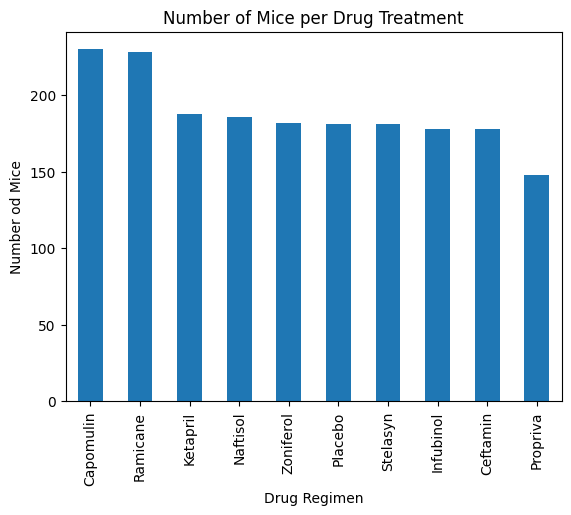

In [283]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#looking at how many mice should show up in the bar plot for reference
mice = clean["Drug Regimen"].value_counts()
mice

#creating bar plot
mice.plot.bar(x = "Drug Regimen")
plt.ylabel("Number od Mice")
plt.xlabel("Drug Regimen")
plt.title("Number of Mice per Drug Treatment")
plt.show()


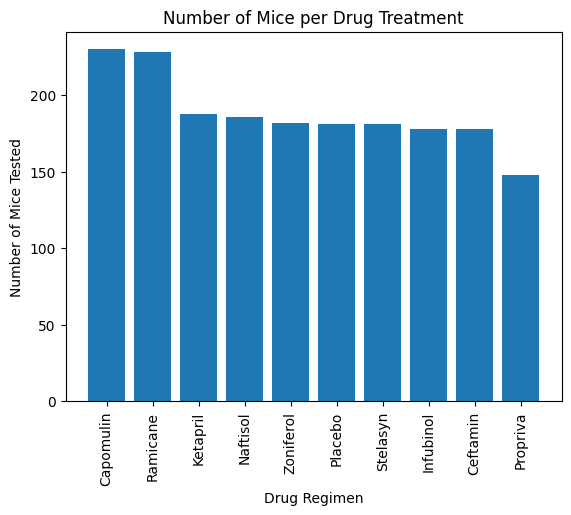

In [284]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
y = mice
x = mice.index.values

plt.bar(x, y)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice per Drug Treatment")
plt.xticks(rotation = "vertical")
plt.show()

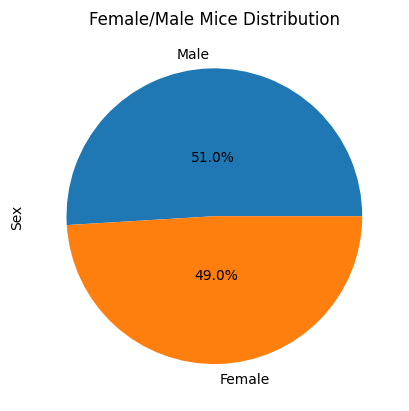

In [285]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_mice = clean["Sex"].value_counts()

#displaying the data in pie chart
gender_mice.plot.pie(autopct="%1.1f%%", pctdistance=0.4)
plt.title("Female/Male Mice Distribution")
plt.ylabel("Sex")
plt.show()

In [286]:
#finding percentages to make the graph easier to make
clean['Sex'].value_counts()
percentsmale = 958 / (958 + 922) * 100
percentsfemale = 922 / (958 + 922) * 100
print(percentsmale, percentsfemale)

50.95744680851064 49.04255319148936


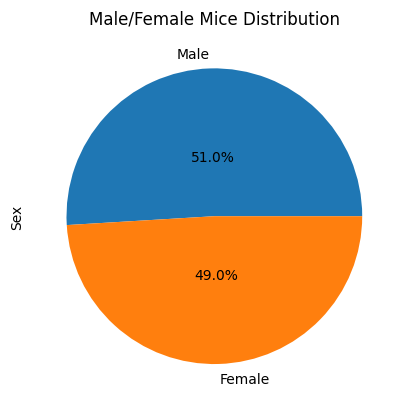

In [287]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
nametags = ["Female", "Male"]
percents = [49.0425, 50.9574]

#help from "https://stackoverflow.com/questions/50602158/matplotlib-pie-chart-variable-pctdistance" with autopct and pctdistance.
pyplotpie = gender_mice.plot.pie(autopct="%1.1f%%", pctdistance=0.4)
plt.ylabel("Sex")
plt.title("Male/Female Mice Distribution")
plt.show()

## Quartiles, Outliers and Boxplots

In [288]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

groups = clean.groupby(['Mouse ID'])['Timepoint'].max()
groups_df = pd.DataFrame(groups)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# A dataframe makes this easier, nto sure if I had to retype the mouse id and timepoints but it worked
mouse_df = pd.merge(clean, groups, on=('Mouse ID', 'Timepoint'))
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [289]:
# Put treatments into a list for for loop (and later for plot labels), and create empty list to fill with tumor vol data (for plotting)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

treatment_name = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    mice_drug = mouse_df.loc[mouse_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']

    quartiles = mice_drug.quantile([0.25, 0.5, 0.75])
    lowq = quartiles[0.25]
    upq = quartiles[0.75]
    IQR = upq-lowq

    low_bound = lowq - (1.5 * IQR)
    up_bound = upq + (1.5 * IQR)

    #I was using "treatment" as a list and a dict so I change it to "treatment_name". I had to do research to find out that I needed to add a .append function.

    treatment_name.append(mice_drug)
    
    print(f"The lower quartile of {treatment} is: {lowq}")
    print(f"The upper quartile of {treatment} is: {upq}")
    print(f"The IQR range of {treatment} is: {IQR}")
    print(f"The the median of {treatment} is: {quartiles[0.5]} ")
    print(f'A value below {low_bound} could be an outlier')
    print(f'A value above {up_bound} could be an outlier')
    print(f'------------------------------------------------------')



The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The IQR range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.1251644 
A value below 20.70456164999999 could be an outlier
A value above 51.83201549 could be an outlier
------------------------------------------------------
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The IQR range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
A value below 17.912664470000003 could be an outlier
A value above 54.30681135 could be an outlier
------------------------------------------------------
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The IQR range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
A value below 36.83290494999999 could be an outlier
A value above 82.74144559000001 could be an outlier
------------------------

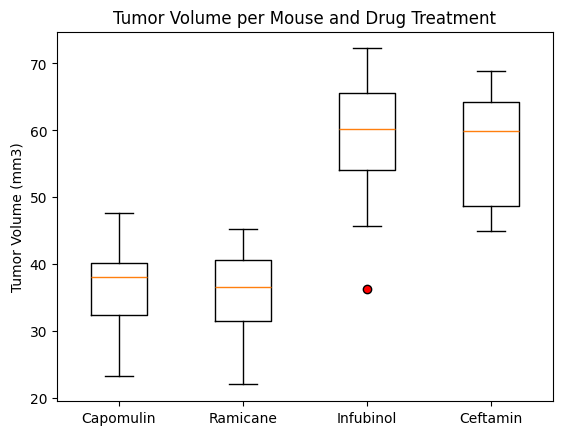

In [290]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
outlier_dot = dict(markerfacecolor ="red")
plt.boxplot(treatment_name, labels = treatments, flierprops= outlier_dot)
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume per Mouse and Drug Treatment')
plt.show()

## Line and Scatter Plots

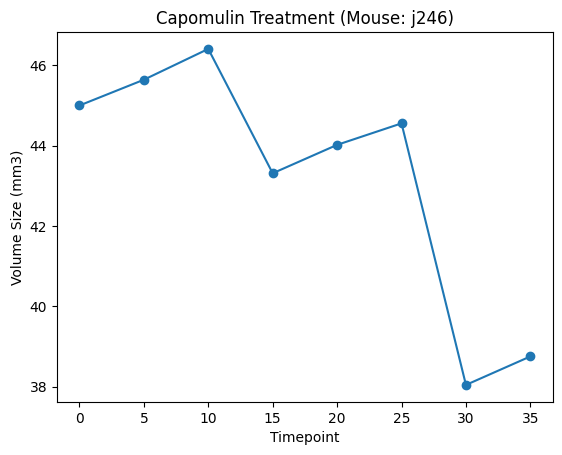

In [291]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap_df = clean.loc[clean['Drug Regimen']== "Capomulin",:] #j246
select_mouse_cap = cap_df.loc[cap_df['Mouse ID'] == 'j246',:]

x = select_mouse_cap['Timepoint']
tumor_size = select_mouse_cap['Tumor Volume (mm3)']

plt.plot(x, tumor_size, marker='o')
plt.xlabel('Timepoint')
plt.ylabel('Volume Size (mm3)')
plt.title('Capomulin Treatment (Mouse: j246)')
plt.show()



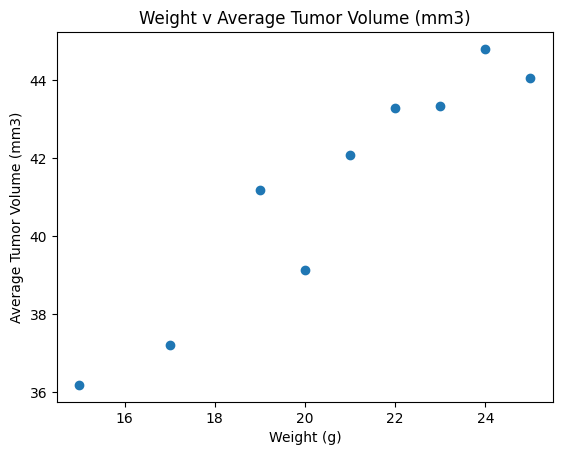

Weight (g)
15    36.182040
17    37.214133
19    41.182391
20    39.141053
21    42.088700
22    43.288490
23    43.341051
24    44.805810
25    44.062109
Name: Tumor Volume (mm3), dtype: float64

In [292]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_scatter = cap_df.groupby(['Weight (g)'])['Tumor Volume (mm3)'].mean()
plt.scatter(cap_scatter.index, cap_scatter)
plt.title("Weight v Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
cap_scatter

## Correlation and Regression

Correlation is 0.95


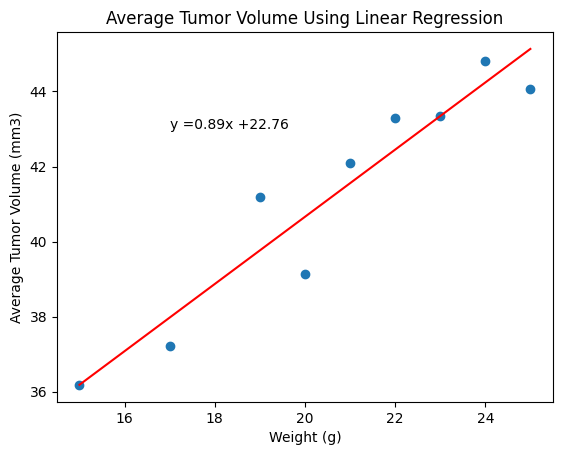

In [293]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
cap_scatter = cap_df.groupby(['Weight (g)'])['Tumor Volume (mm3)'].mean().reset_index()
x = cap_scatter['Weight (g)']
y = cap_scatter['Tumor Volume (mm3)']

correlation = st.pearsonr(x,y)
print(f'Correlation is {round(correlation[0],2)}')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
values = x * slope + intercept

#help from "https://www.statology.org/seaborn-regplot-equation/"
line = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x, values, "r-")

plt.title('Average Tumor Volume Using Linear Regression')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
#had to use stack overslow and scipystats.org to figure out the annotate function and thought it would be a good addition to the scatter plot and lin regression.
#"https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html"
plt.annotate(line,(17,43))
plt.show()